### <span style='color:violet'>U.S. Medical Insurance Portfolio Project</span>

In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# import ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# set path to the dataset
input_folder = '/Users/alexandrabrown/Desktop/data_science/datasets'
input_file   = 'insurance.csv'
input_path   = os.path.join(input_folder, input_file)

# load the data as DataFrame
df = pd.read_csv(input_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### <span style='color:violet'>Project Goals:</span>
#### <span style='color:#B8B6F6'>1) Does region influence insurance cost?</span>
  - Is there an equal representation of all the regions in the dataset?
#### <span style='color:#81E7E7'>2) Who pays more for insurance on the average - Males or Females?</span>
  - Is there an equal distribution of Males/Females in the dataset?
#### <span style='color:#9FE2BF'>3) What factors influence insurance cost the most?</span>

### <span style='color:#B8B6F6'>1) Does region influence insurance cost?</span>

In [3]:
# group the DataFrame by the region column and compute the average cost for each region
region_avg = df.groupby('region')['charges'].mean()
region_avg

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

The southeast region has the highest average insurance cost, is this because a few outliers are skewing the data? Check the median to see if it is also highest for the southeast region.

In [4]:
region_med = df.groupby('region')['charges'].median()
region_med

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

Turns out the northeast region has the highest median insurance cost, with souteast being the second highest.

In [5]:
# what is the highest insurance costs in the southest & northeast?

# get max charges value for southeast region
southeast_max = df.loc[df['region'] == 'southeast']['charges'].max()
# get max charges value for northeast region
northeast_max = df.loc[df['region'] == 'northeast']['charges'].max()

# print the results
print(f'The max insurance cost in the southeast region is: ${southeast_max}')
print(f'The max insurance cost in the northeast region is: ${northeast_max}')

The max insurance cost in the southeast region is: $63770.42801
The max insurance cost in the northeast region is: $58571.07448


#### <span style='color:#B8B6F6'>It seems like the max insurance cost in the southeast region might be an outlier</span>
Lets look at all the column values for these individuals with the max costs to see what factors led to this high cost

In [6]:
# 1) max southest row
# filter for southeast region
southeast = df[df['region'] == 'southeast']
# grab full row of max charges value for southeast region
southeast_max_row = southeast[southeast['charges'] == southeast['charges'].max()]
southeast_max_row

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [7]:
# 2) max northeast row
# filter for northeast region
northeast = df[df['region'] == 'northeast']
# grab full row of max charges value for northeast region
northeast_max_row = northeast[northeast['charges'] == northeast['charges'].max()]
northeast_max_row

,age,sex,bmi,children,smoker,region,charges
577,31,female,38.095,1,yes,northeast,58571.07448


### <span style='color:#B8B6F6'>Interestingly both of these individuals are females, with very high BMIs, and smokers</span>

### <span style='color:#B8B6F6'>1b) Is there equal representation of all regions in the dataset?</span>

In [8]:
region_totals = df.value_counts(subset='region')
region_totals

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

### <span style='color:#81E7E7'>2) Are insurance costs different for men Vs. women?</span>

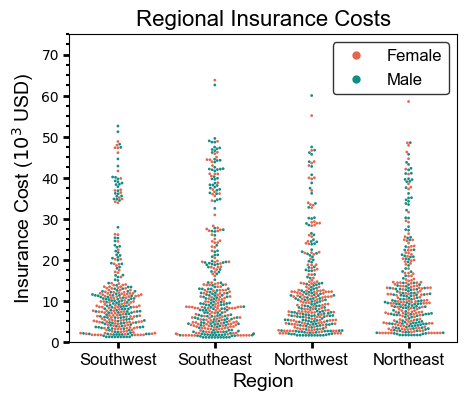

In [9]:
#scale y-values
y_vals = df['charges']/1000

# set custom palette
custom_pal = ["#e5664e","#128d85"]

# create the figure & axes
fig, axs = plt.subplots(figsize=(5,4))
#box   = sns.boxplot(x='region', y=y_vals, data=df, color="#7f7b6f", ax=axs, fliersize=4, linewidth=2, showfliers=False)
swarm = sns.swarmplot(x='region', y=y_vals, palette=custom_pal, hue='sex', data=df, size=2, ax=axs)
# alternative plot
#sns.barplot(x='region', y=y_vals, color="#7f7b6f", ax=axs, estimator='median', data=df, errorbar=('pi', 50), capsize=0.05,)

# customize labels
axs.set_xlabel('Region', fontname='arial', fontsize=14)
axs.set_ylabel(r'Insurance Cost ($10^3$ USD)', fontname='arial', fontsize=14)
axs.set_title('Regional Insurance Costs', fontname='arial', fontsize=16)
# customize ticks
axs.set_xticks([0,1,2,3], ['Southwest', 'Southeast', 'Northwest', 'Northeast'], fontname='arial', fontsize=12)
axs.set_yticks(np.arange(0, 75, 10))
axs.set_ylim([0, 75])
axs.tick_params(axis='both', which='major', length=4, width=2)
# customize minor ticks
axs.minorticks_on()
axs.yaxis.set_minor_locator(MultipleLocator(2.5))
axs.tick_params(axis='y', which='minor', length=2, width=1.5)
axs.tick_params(axis='x', which='minor', bottom=False, top=False)

# customize legend
# extract legend handles from swarmplot
handles, _ = swarm.get_legend_handles_labels()
axs.legend(handles=handles, title=None, labels=['Female', 'Male'], markerscale=3, prop={'family':'arial', 'size':12}, frameon=True, edgecolor='black')


plt.show()

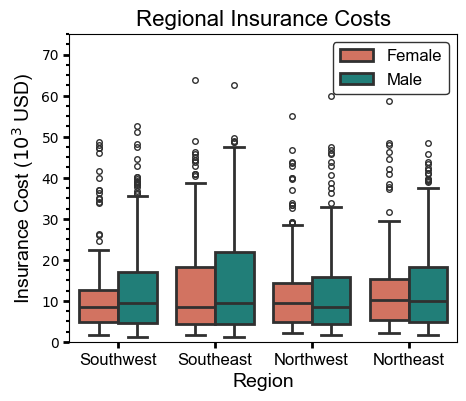

In [10]:
# customize color palette
custom_pal = ["#e5664e","#128d85"]

fig, axs = plt.subplots(figsize=(5,4))
box = sns.boxplot(x='region', y=y_vals, data=df, hue='sex',  
                    palette=custom_pal, ax=axs, fliersize=4, linewidth=2)

# customize labels
axs.set_xlabel('Region', fontname='arial', fontsize=14)
axs.set_ylabel(r'Insurance Cost ($10^3$ USD)', fontname='arial', fontsize=14)
axs.set_title('Regional Insurance Costs', fontname='arial', fontsize=16)
# customize ticks
axs.set_xticks([0,1,2,3], ['Southwest', 'Southeast', 'Northwest', 'Northeast'], fontname='arial', fontsize=12)
axs.set_yticks(np.arange(0, 75, 10))
axs.set_ylim([0, 75])
axs.tick_params(axis='both', which='major', length=4, width=2)
axs.minorticks_on()
axs.yaxis.set_minor_locator(MultipleLocator(2.5))
axs.tick_params(axis='y', which='minor', length=2, width=1.5)
axs.tick_params(axis='x', which='minor', bottom=False, top=False)


# customize legend
handles, _ = box.get_legend_handles_labels()
axs.legend(handles=handles, title=None, labels=['Female', 'Male'], prop={'size':12, 'family':'arial'}, frameon=True, edgecolor='black')

plt.show()




Comparing male and female insurance costs across all regions there is not a clear difference. 
### <span style='color:#81E7E7'>2b) Is there an equal distribution of males & females in the dataset within each region?</span>

In [11]:
df.groupby(['region', 'sex']).size().reset_index(name='count')

,region,sex,count
0,northeast,female,161
1,northeast,male,163
2,northwest,female,164
3,northwest,male,161
4,southeast,female,175
5,southeast,male,189
6,southwest,female,162
7,southwest,male,163


Although there are some differences in the numbers of males and females in each region, these differences don't seem to be too dramatic. 

### <span style='color:#9FE2BF'>3) What factors influence insurance cost the most?</span>

<span style='color:#40E0D0'>Create a correlation heatmap of all the variables to visualize an overview of the linear relationships between all features and the target variable (cost).
This can help eliminate features that might not contribute much to a model. This step can also help in deciding which models to focus on. If relationships are mostly linear it would be better to start with simpler models like linear regression, ridge, lasso. If relationships seem complex, try random forest, gradient boosting, or SVR.</span>

<span style='color:#40E0D0'>Since the varible we want to predict (charges) is continuous this is a regression problem! Test multiple models & compare their performances using MSE & R<sup>2</sup>. MSE measures the average squared difference between the actual values and the predicted values (the closer the MSE is to 0 the better the model is). R<sup>2</sup> is a measure of how well the model's predictions match the actual data. It represents the proportion of the variance in the target variable that is predicatable from the independent variables (0 = model explains nothing, 1 = model is perfect, if less than 0 then model is worse than a model that simply predict the mean for all data points)</span>

#### <span style='color:#9FE2BF'>Models to consider:</span>
1) Linear regression
2) Ridge regression
3) Lasso regression
4) Random forest
5) Gradient boosting
6) SVR
7) Decision tree

<span style='color:#40E0D0'>Models that support feature importance:</span> Random Forest, Gradient Boostin, and Decision Trees

In [12]:
# data pre-processing! convert categorical variables using OneHotEncoder
cat_vars = ['sex', 'region', 'smoker']
# drop first to reduce redundancy in the data!
encoder  = OneHotEncoder(drop='first', sparse_output=False)
encoded_vars = encoder.fit_transform(df[cat_vars])

# created encoded_df with new cat_var encoding
encoded_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(cat_vars))

# grab numerical_vars from df
num_vars = df[['age', 'bmi', 'children', 'charges']]

# concat encoded data with numerical data
df_encoded = pd.concat([encoded_df, num_vars], axis=1)
df_encoded

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,age,bmi,children,charges
0,0.0,0.0,0.0,1.0,1.0,19,27.900,0,16884.92400
1,1.0,0.0,1.0,0.0,0.0,18,33.770,1,1725.55230
2,1.0,0.0,1.0,0.0,0.0,28,33.000,3,4449.46200
3,1.0,1.0,0.0,0.0,0.0,33,22.705,0,21984.47061
4,1.0,1.0,0.0,0.0,0.0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,1.0,1.0,0.0,0.0,0.0,50,30.970,3,10600.54830
1334,0.0,0.0,0.0,0.0,0.0,18,31.920,0,2205.98080
1335,0.0,0.0,1.0,0.0,0.0,18,36.850,0,1629.83350
1336,0.0,0.0,0.0,1.0,0.0,21,25.800,0,2007.94500


### <span style='color:#9FE2BF'>Calculate correlation matrix and plot</span>

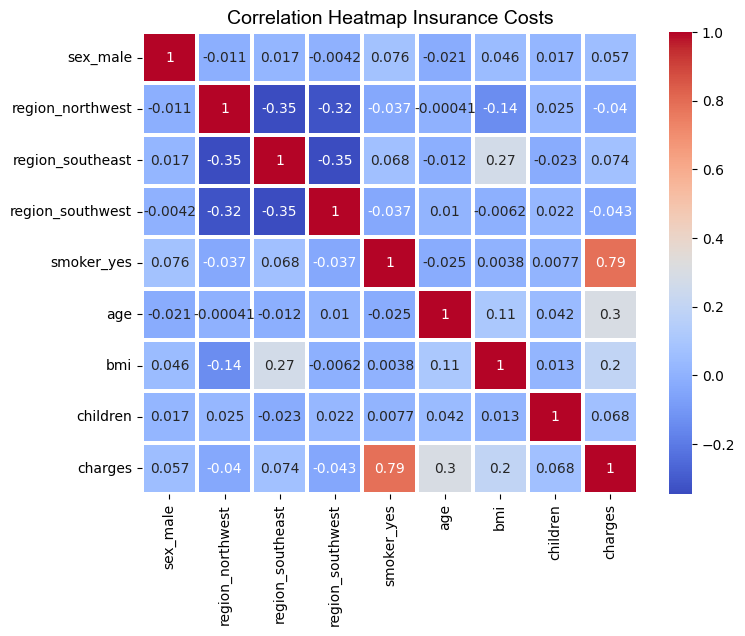

In [13]:
# calc corr matrix (new df)
correlation_matrix = df_encoded.corr()

# plotting time!
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=1.5)
plt.title('Correlation Heatmap Insurance Costs', fontname='arial', fontsize=14)
plt.show()

In [14]:
# this matrix isn't too big, but if we had more varibles it might be difficult to figure out which ones
# have the highest correlations (excluding self correlations). Here we print the top 10 correlations!
correlation_series = correlation_matrix.unstack()
# grab all correlations where the first index does not equal the second index
filtered_corrs = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]

# sort correlations & display top 10
sorted_corrs = filtered_corrs.sort_values(ascending=False)
top_corr_df = sorted_corrs.reset_index()
top_corr_df.columns = ['Var1', 'Var2', 'Correlation']
top_corr_df.head(n=10)


,Var1,Var2,Correlation
0,charges,smoker_yes,0.787251
1,smoker_yes,charges,0.787251
2,charges,age,0.299008
3,age,charges,0.299008
4,region_southeast,bmi,0.270025
5,bmi,region_southeast,0.270025
6,bmi,charges,0.198341
7,charges,bmi,0.198341
8,age,bmi,0.109272
9,bmi,age,0.109272


### <span style='color:#9FE2BF'>Smoking status seems to play a big role in determining insurance cost, but lets keep all varibles in our model & see what happens</span>
First we need to split the data into features (X) and target varible (y). Then z-score scale the features
to prevent larger ranges of values from dominating, which could lead to bias in the model. This operation makes the mean 0 and stdev 1. Next we split the data into training & testing sets.

In [15]:
# split the df_encoded dataframe into features & target varible
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# convert X_scaled into DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# split the data into training & testing sets (random_state is an int value the is needed if we
# want to split the data the same way for comparing other models)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

### <span style='color:#9FE2BF'>Test various regression models</span>

In [16]:
# define function to evaluate models
def evaluate_model(mode, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # calc mse & r2
    mse    = mean_squared_error(y_test, y_pred)
    r2     = r2_score(y_test, y_pred)
    return mse, r2


# define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor()
}

# evaluate each model
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    # add outcome to results dict
    results[name] = {'MSE': mse, 'R² Score': r2}

# convert to df (transpose to make models along the rows and mse & r2 the cols)
results_df = pd.DataFrame(results).T
results_df

,MSE,R² Score
Linear Regression,3.359692e+07,0.783593
Ridge Regression,3.360496e+07,0.783541
Lasso Regression,3.360115e+07,0.783566
Random Forest,2.067744e+07,0.866811
Gradient Boosting,1.885429e+07,0.878554
SVR,1.661253e+08,-0.070059
Decision Tree,4.108346e+07,0.735370


### <span style='color:#9FE2BF'>All models performed poorly when using all features to predict insurance cost</span> 
This time retrain the model but using only the features that were correlated with charges (smoker, age, bmi).

In [17]:
# filter X_scaled for only smoker, bmi, age
X_reduced = X_scaled_df[['smoker_yes', 'age', 'bmi']]

# split the data for training & testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [18]:
# evaluate each model
results_reduced = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train2, X_test2, y_train2, y_test2)
    # add outcome to results dict
    results_reduced[name] = {'MSE': mse, 'R² Score': r2}

# convert to df (transpose to make models along the rows and mse & r2 the cols)
results_df_reduced = pd.DataFrame(results_reduced).T
results_df_reduced

,MSE,R² Score
Linear Regression,3.451284e+07,0.777693
Ridge Regression,3.451797e+07,0.777660
Lasso Regression,3.451324e+07,0.777691
Random Forest,2.620529e+07,0.831204
Gradient Boosting,2.013330e+07,0.870316
SVR,1.649669e+08,-0.062597
Decision Tree,3.819514e+07,0.753975


### <span style='color:#9FE2BF'>Reducing the number of features down to age, bmi, & smoker status didn't really improve model performance</span>
The relationship seems to be complex because linear models are consistnetly performing poorly. Grandient boosting & random forest seem to be doing the best, but they're still not good. 
#### <span style='color:#9FE2BF'>Considerations going forward:</span>
1) Would creating interaction features help? (age * bmi) or (smoker * bmi) or (age * smoker) 
2) Hyperparameter tuning is necessary! So far we have only executed the models using default settings.
3) Leave in all features because random forest & gradient boosting did better on the first run when all features were incorcorated. 